# **APARTADO 3**

1. Crea una mostra aleatòria de 1000 elements (individus) que representi les alçades de 1000 dones. Utilitza un decimal de precisió per a cada valor de la mostra.
2. Dibuixa l'histograma de la mostra.
3. Obté els intervals de confiança per a la mitjana amb un nivell de confiança del 90%, 95% i 99%.
4. Calcula les probabilitats següents (expressades en percentatge).  
    a. Que una dona sigui més baixa de 160 cm  
    b. Que estigui entre 160 i 170 cm, sense arribar a 170 cm  
    c. Que estigui entre 170 i 180 cm, sense arribar a 180 cm  
    d. Que sigui faci 180 cm o més

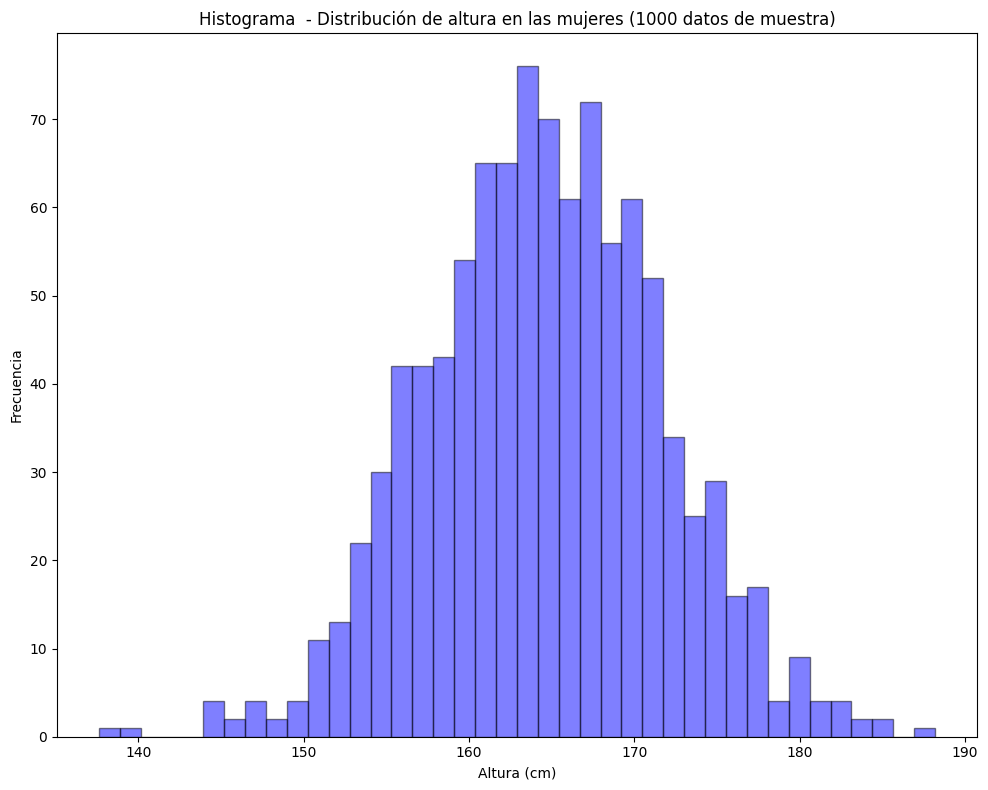

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Crear una muestra aleatoria de 1000 elementos
average_height = 164.7
std_height = 7.1
sample_size = 1000

np.random.seed(50)
sample_heights = np.round(np.random.normal(average_height, std_height, sample_size), 1)

# Dibujo del histograma
plt.figure(figsize=(10, 8))
plt.hist(sample_heights, bins=40, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histograma  - Distribución de altura en las mujeres (1000 datos de muestra)')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Obtener intervalos de confianza para el promedio
confidence_levels = [0.9, 0.95, 0.99]
print("Intervalos de confianza según distintos niveles de confianza:")
for conf_level in confidence_levels:
  z_value = stats.norm.ppf(1 - (1 - conf_level) / 2)
  lower_bound = average_height - z_value * (std_height / np.sqrt(sample_size))
  upper_bound = average_height + z_value * (std_height / np.sqrt(sample_size))
  print(f"{int(conf_level * 100)}%: [{lower_bound:.2f}, {upper_bound:.2f}]")

Intervalos de confianza según distintos niveles de confianza:
90%: [164.33, 165.07]
95%: [164.26, 165.14]
99%: [164.12, 165.28]


In [ ]:
# Obtener probabilidades para distintos casos
prob_less_than_160 = stats.norm.cdf(160, average_height, std_height) * 100
prob_between_160_and_170 = (stats.norm.cdf(170, average_height, std_height) - stats.norm.cdf(160, average_height, std_height)) * 100
prob_between_170_and_180 = (stats.norm.cdf(180, average_height, std_height) - stats.norm.cdf(170, average_height, std_height)) * 100
prob_bigger_than_180 = (1 - stats.norm.cdf(180, average_height, std_height)) * 100

print(f"La probabilidad de que una mujer mida menos de 160cm es: {prob_less_than_160:.2f}%")
print(f"La probabilidad de que una mujer mida entre 160 y 170cm (sin incluir 170 cm) es: {prob_between_160_and_170:.2f}%")
print(f"La probabilidad de que una mujer mida entre 170 y 180cm (sin incluir 180 cm) es: {prob_between_170_and_180:.2f}%")
print(f"La probabilidad de que una mujer mida 180cm o más es: {prob_bigger_than_180:.2f}%")

La probabilidad de que una mujer mida menos de 160cm es: 25.40%
La probabilidad de que una mujer mida entre 160 y 170cm (sin incluir 170 cm) es: 51.83%
La probabilidad de que una mujer mida entre 170 y 180cm (sin incluir 180 cm) es: 21.21%
La probabilidad de que una mujer mida 180cm o más es: 1.56%
